# RGR Stock Price Forecasting Project

Author: Jack Wang

---

## Problem Statement

Stock prices are hard to predict because they are not only affected by the performance of the underlying companies but also the expectations from the general public. As known, the stock price of firearm companies are highly correlated to the public opinions toward gun ban. My model intends to predict the stock price of one of the largest firearm company in the states, RGR (Sturm, Ruger & Co., firearm company), by using its historical stock price and public opinions toward gun ban. 

## Executive Summary

The goal of my projcet is to build a **time series regression model** that predicts the stock price of RGR. The data I am using would be historical stock price from Yahoo Finance, twitter posts scraped from [twitter](https://twitter.com/), and also the news articles from major news website. I will perform NPL on the text data and time series modeling on the historical stock price data. The model will be evaluated using R^2 score.

## Content

This project consists of 5 Jupyter notebooks:
- ***Part-1-stock-price-data***
- Part-2-twitter-scraper
- Part-3-twitter-data-cleaning
- Part-4-reddit-data-scraper
- Part-5-reddit-data-cleaning
    - [Example](#Most-Frequent-Words-in-Title-and-Content)
- Part-6-Conclusion-and-Discussion


---


In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools

# from datetime import datetime
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import adfuller


# %matplotlib inline

# # This will allow us to avoid a FutureWarning when plotting.
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

plt.style.use('fivethirtyeight')

In [226]:
df_twitter = pd.read_csv("../data/twitter/twitter.csv")
df_reddit = pd.read_csv("../data/reddit/reddit.csv")
df_sec = pd.read_csv("../data/sec/sec_data.csv")
df_rgr = pd.read_csv("../data/stock_price/stock_price_2014_to_2019.csv")

In [227]:
df_rgr = df_rgr.loc[:,['Date', 'Open']]

In [228]:
df_rgr.columns = ['date', 'open_price']

In [229]:
df_rgr = df_rgr.iloc[693:1446].reset_index(drop=True)

In [238]:
df_final = pd.merge(df_rgr, df_twitter, how='outer')

In [239]:
df_final = pd.merge(df_final, df_reddit, how = 'outer')

In [240]:
df_final = pd.merge(df_final, df_sec, how = 'outer' )

In [241]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [242]:
df_final = df_final.set_index('date')

In [243]:
df_final = df_final.sort_index()

In [244]:
df_final.shape

(1095, 21)

In [247]:
df_final = df_final.fillna(0)

In [250]:
df_final = df_final[df_final['open_price']!=0]

In [251]:
df_final

,open_price,tweet_word_count_sum,tweet_compound_score_sum,tweets_sum,tweet_word_count_mean,tweet_compound_score_mean,redd_gun_score_mean,redd_gun_comment_mean,redd_gun_compound_mean,redd_gun_score_sum,...,redd_gun_post_count,redd_pol_score_mean,redd_pol_comment_mean,redd_pol_compound_mean,redd_pol_score_sum,redd_pol_comment_sum,redd_pol_post_count,10-k,10-q,8-k
date,,,,,,,,,,,,,,,,,,,,,
2016-10-03,57.790001,18548,-401.5402,1133,16.370697,-0.354404,0.0,0.0,0.0000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04,57.470001,16554,-356.2059,1017,16.277286,-0.350252,0.0,0.0,0.0000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-05,57.330002,19727,-338.7394,1194,16.521776,-0.283701,0.0,0.0,0.0000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-06,56.400002,12924,-220.6480,807,16.014870,-0.273418,0.0,7.0,-0.7184,0.0,...,1.0,2.000000,5.0,-0.195800,4.0,10.0,2.0,0.0,0.0,0.0
2016-10-07,56.020000,9767,-210.2939,613,15.933116,-0.343057,1.0,1.0,-0.1280,1.0,...,1.0,0.000000,3.0,0.361200,0.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-24,41.680000,115463,-1185.5061,3796,30.417018,-0.312304,0.0,0.0,0.0000,0.0,...,0.0,16.666667,17.0,-0.068367,50.0,51.0,3.0,0.0,0.0,0.0
2019-09-25,41.560001,96800,-993.2352,3213,30.127607,-0.309130,0.0,0.0,0.0000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-26,41.470001,100093,-1024.4333,3372,29.683571,-0.303806,0.0,0.0,0.0000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


**GrideSearch over SARIMA**

In [380]:
train = df_final['2016':'2018']
test = df_final['2019']

In [381]:
train.corr()

,open_price,tweet_word_count_sum,tweet_compound_score_sum,tweets_sum,tweet_word_count_mean,tweet_compound_score_mean,redd_gun_score_mean,redd_gun_comment_mean,redd_gun_compound_mean,redd_gun_score_sum,...,redd_gun_post_count,redd_pol_score_mean,redd_pol_comment_mean,redd_pol_compound_mean,redd_pol_score_sum,redd_pol_comment_sum,redd_pol_post_count,10-k,10-q,8-k
open_price,1.000000,-0.135835,0.124171,-0.133505,0.166185,0.187183,0.007457,-0.029288,0.095432,-0.003126,...,-0.108268,-0.007994,0.048663,-0.004408,-0.127915,-0.095157,-0.198909,-0.075070,0.039278,0.069770
tweet_word_count_sum,-0.135835,1.000000,-0.974359,0.979522,0.230546,-0.094229,0.100555,0.159950,-0.185772,0.108999,...,0.399339,0.139536,0.126963,-0.150374,0.704454,0.733261,0.766612,0.109585,-0.020880,0.063358
tweet_compound_score_sum,0.124171,-0.974359,1.000000,-0.996970,-0.168852,0.132607,-0.135916,-0.167656,0.183301,-0.148373,...,-0.443484,-0.138188,-0.130718,0.144904,-0.724142,-0.784857,-0.763330,-0.087173,0.020466,-0.067876
tweets_sum,-0.133505,0.979522,-0.996970,1.000000,0.186559,-0.109294,0.142738,0.182500,-0.195304,0.155854,...,0.465010,0.141320,0.130870,-0.152334,0.732296,0.784138,0.800232,0.099947,-0.021251,0.075179
tweet_word_count_mean,0.166185,0.230546,-0.168852,0.186559,1.000000,0.141567,-0.001287,0.019187,-0.031032,-0.019736,...,0.026325,0.125619,0.156444,-0.160998,0.140924,0.152488,0.198581,0.001317,-0.009244,-0.040790
tweet_compound_score_mean,0.187183,-0.094229,0.132607,-0.109294,0.141567,1.000000,-0.025809,-0.005880,-0.003679,-0.022504,...,-0.016321,-0.024405,0.002668,0.084735,-0.043286,-0.074498,-0.017401,-0.012782,0.048337,0.044311
redd_gun_score_mean,0.007457,0.100555,-0.135916,0.142738,-0.001287,-0.025809,1.000000,0.336530,-0.069250,0.937540,...,0.376987,-0.006260,-0.000632,-0.048394,0.021164,0.075627,0.287083,-0.003889,-0.007309,-0.014916
redd_gun_comment_mean,-0.029288,0.159950,-0.167656,0.182500,0.019187,-0.005880,0.336530,1.000000,-0.415773,0.330954,...,0.549512,0.010775,0.009008,-0.056734,0.177999,0.155664,0.257976,-0.017297,-0.032504,-0.017403
redd_gun_compound_mean,0.095432,-0.185772,0.183301,-0.195304,-0.031032,-0.003679,-0.069250,-0.415773,1.000000,-0.032658,...,-0.572305,0.001475,-0.023200,0.071595,-0.104368,-0.153425,-0.228289,0.022129,0.041585,0.028504
redd_gun_score_sum,-0.003126,0.108999,-0.148373,0.155854,-0.019736,-0.022504,0.937540,0.330954,-0.032658,1.000000,...,0.384186,-0.003565,-0.002406,-0.033276,0.025942,0.080788,0.308117,-0.002810,-0.005281,-0.010787


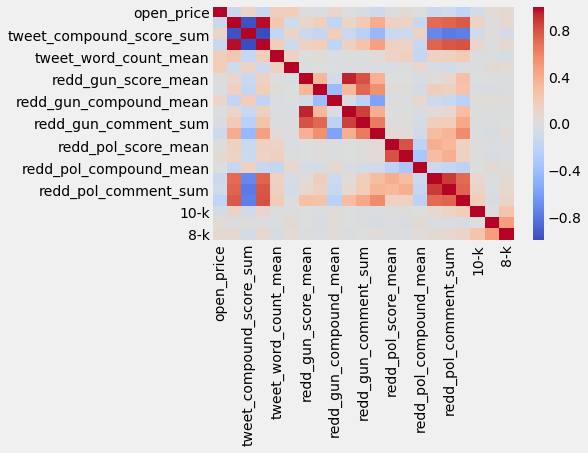

In [382]:
sns.heatmap(train.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1)

In [383]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]

seasonal_pdq

[(0, 0, 0, 5),
 (0, 0, 1, 5),
 (0, 1, 0, 5),
 (0, 1, 1, 5),
 (1, 0, 0, 5),
 (1, 0, 1, 5),
 (1, 1, 0, 5),
 (1, 1, 1, 5)]

In [384]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['open_price'],
                                            train.drop(columns='open_price'),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC: 6922.601103158166


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 5) - AIC: 3750.443324262287


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 5) - AIC: 5616.565306443382


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 5) - AIC: 2620.9529656487593


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 5) - AIC: 3595.661913094662


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 5) - AIC: 3601.4549578292986


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 5) - AIC: 2618.665161015965


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 5) - AIC: 2621.365509947672


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 5) - AIC: 3681.3624573355773


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 5) - AIC: 3604.23921907936


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 5) - AIC: 2462.6405998770247


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 5) - AIC: 2396.416050662762
ARIMA(0, 0, 1)x(1, 0, 0, 5) - AIC: 3614.6231073279996


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 5) - AIC: 3563.382990751782


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 5) - AIC: 2421.1133875719715


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 5) - AIC: 2398.2498562644632


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 0, 5) - AIC: 4804.484439191368


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 5) - AIC: 1789.9489581031949


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 5) - AIC: 5155.0748606933175


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 5) - AIC: 1821.1075182987147


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 5) - AIC: 1791.9700669653469


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 5) - AIC: 1791.6515008384442


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 5) - AIC: 1974.1069785036696


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 5) - AIC: 1838.6859328463806


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 5) - AIC: 1799.7616091499895


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC: 1788.5938195276385


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 5) - AIC: 2179.9739485645796


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 5) - AIC: 1906.5798526626245


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 5) - AIC: 1793.2109334217703


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC: 1790.2312284791656


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 5) - AIC: 2008.0849844412132


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 5) - AIC: 1918.3790526816622


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 0, 5) - AIC: 3425.734080665352


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 5) - AIC: 3411.4933691044143


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 5) - AIC: 2191.9941559512986


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 5) - AIC: 2108.493769113463


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 5) - AIC: 3559.248848180741


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 5) - AIC: 3431.9118586178574


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 5) - AIC: 2133.9056438602884


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 5) - AIC: 2110.73996581886


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 5) - AIC: 3356.7182752840454


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 5) - AIC: 3361.3404042526345


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 5) - AIC: 2189.8694514846193


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 5) - AIC: 2108.2799539565954


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 5) - AIC: 3540.9737390441087


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 5) - AIC: 3393.0254904199383


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 5) - AIC: 2136.1470138635177


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 5) - AIC: 2110.581345060025


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 0, 5) - AIC: 1801.9274148284815


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 5) - AIC: 1791.1894539897119


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 5) - AIC: 2182.9005573340355


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 5) - AIC: 1908.9324015493958


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 5) - AIC: 1791.0652979685897


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 5) - AIC: 1792.8674988952553


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 5) - AIC: 2003.6716044750297


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 5) - AIC: 1920.909824215394


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 5) - AIC: 1801.8002670416272


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 5) - AIC: 1790.6375640804717


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 5) - AIC: 2181.9242278954644


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 5) - AIC: 1908.8757779282541


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 5) - AIC: 1793.0772636791728


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 5) - AIC: 1792.2656392711738


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 5) - AIC: 2006.0867517035426
ARIMA(1, 1, 1)x(1, 1, 1, 5) - AIC: 1920.66499276727


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The best SARIMAX model based on AIC score is with (0, 1, 1)X(0, 0, 1, 5)

ARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC: 2295.3517542193094
ARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC: 1788.5938195276385

ARIMA(0, 1, 2)x(1, 0, 2, 5) - AIC: 2280.002803258474

In [422]:
mod = sm.tsa.statespace.SARIMAX(endog=train['open_price'],
                                exog=train.drop(columns='open_price'),
                                order=(0, 1, 1),
                                seasonal_order=(0, 0, 1, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
tweet_word_count_sum      -1.502e-07   1.56e-06     -0.096      0.923   -3.21e-06    2.91e-06
tweet_compound_score_sum  -4.047e-05      0.000     -0.118      0.906      -0.001       0.001
tweets_sum                 1.004e-05      0.000      0.078      0.938      -0.000       0.000
tweet_word_count_mean        -0.0461      0.074     -0.622      0.534      -0.191       0.099
tweet_compound_score_mean     1.1020      1.445      0.763      0.446      -1.730       3.934
redd_gun_score_mean           0.0085      0.063      0.136      0.892      -0.114       0.131
redd_gun_comment_mean         0.0607      0.026      2.368      0.018       0.010       0.111
redd_gun_compound_mean        0.3898      0.314      1.240      0.215      -0.226       1.006
redd_gun_score_sum            0.0052      0.011      0.473  

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**As we can see, the p-value for all features are pretty high. We can conclude this model is performing poorly.**

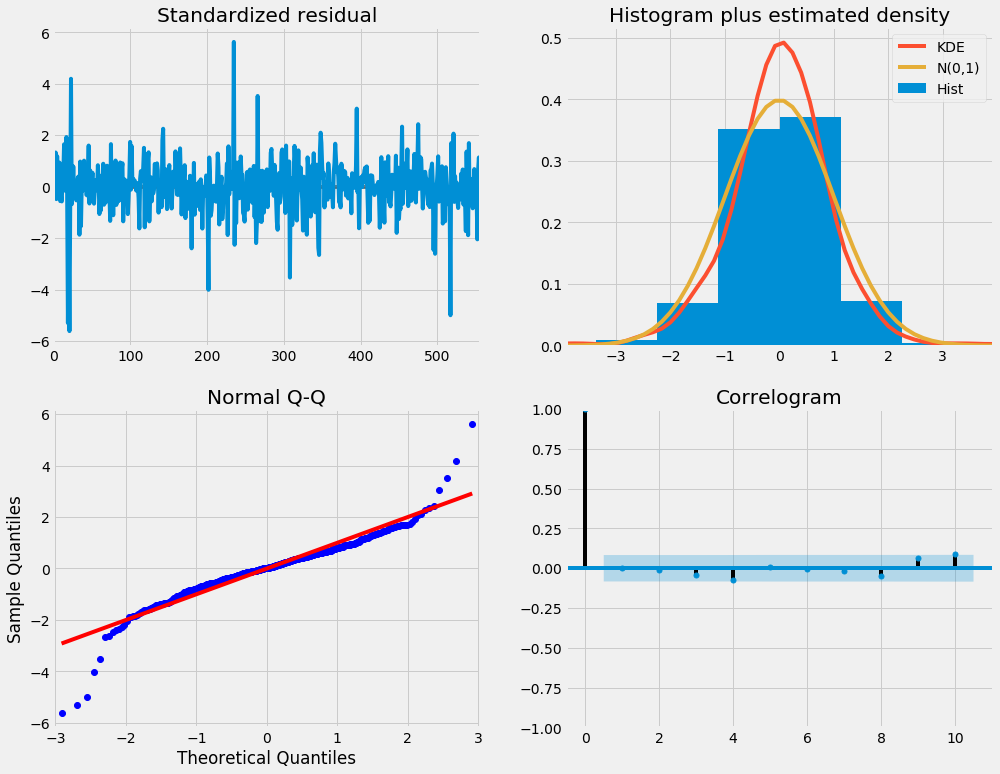

In [423]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

**The above plot shows that the residuals of our model are not normally distributed well. We should improve on our model. Our ultimate goal is to have uncorrelated residuals and normally distributed residuals.**

In [424]:
test_dates = test.index

In [425]:
sarima_preds

565    52.897833
566    52.865148
567    52.938242
568    52.686982
569    52.673848
         ...    
748    52.748423
749    52.794428
750    52.823142
751    53.059061
752    52.777065
Length: 188, dtype: float64

In [426]:
train

,open_price,tweet_word_count_sum,tweet_compound_score_sum,tweets_sum,tweet_word_count_mean,tweet_compound_score_mean,redd_gun_score_mean,redd_gun_comment_mean,redd_gun_compound_mean,redd_gun_score_sum,...,redd_gun_post_count,redd_pol_score_mean,redd_pol_comment_mean,redd_pol_compound_mean,redd_pol_score_sum,redd_pol_comment_sum,redd_pol_post_count,10-k,10-q,8-k
date,,,,,,,,,,,,,,,,,,,,,
2016-10-03,57.790001,18548,-401.5402,1133,16.370697,-0.354404,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04,57.470001,16554,-356.2059,1017,16.277286,-0.350252,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-05,57.330002,19727,-338.7394,1194,16.521776,-0.283701,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-06,56.400002,12924,-220.6480,807,16.014870,-0.273418,0.0,7.0,-0.7184,0.0,...,1.0,2.0,5.0,-0.19580,4.0,10.0,2.0,0.0,0.0,0.0
2016-10-07,56.020000,9767,-210.2939,613,15.933116,-0.343057,1.0,1.0,-0.1280,1.0,...,1.0,0.0,3.0,0.36120,0.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,50.020000,33602,-311.9478,1147,29.295554,-0.271968,0.0,0.0,0.0000,0.0,...,0.0,1.0,138.0,-0.34000,1.0,138.0,1.0,0.0,0.0,0.0
2018-12-26,50.549999,23512,-224.3712,833,28.225690,-0.269353,0.0,0.0,0.0000,0.0,...,0.0,1.0,19.0,-0.34000,1.0,19.0,1.0,0.0,0.0,0.0
2018-12-27,51.810001,41232,-475.3081,1420,29.036620,-0.334724,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [427]:
start = test_dates[0]
end = test_dates[-1]

In [428]:
results.nobs

565

In [450]:
pred = results.get_prediction(start = results.nobs, 
                               end = results.nobs+187, 
                               exog=test.drop(columns='open_price'))

pred_ci = preds.conf_int()


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [456]:
pred_ci.iloc[:,0]

565    50.696528
566    49.583451
567    48.879093
568    48.064743
569    47.533517
         ...    
748    21.824537
749    21.786706
750    21.731810
751    21.884343
752    21.519183
Name: lower open_price, Length: 188, dtype: float64

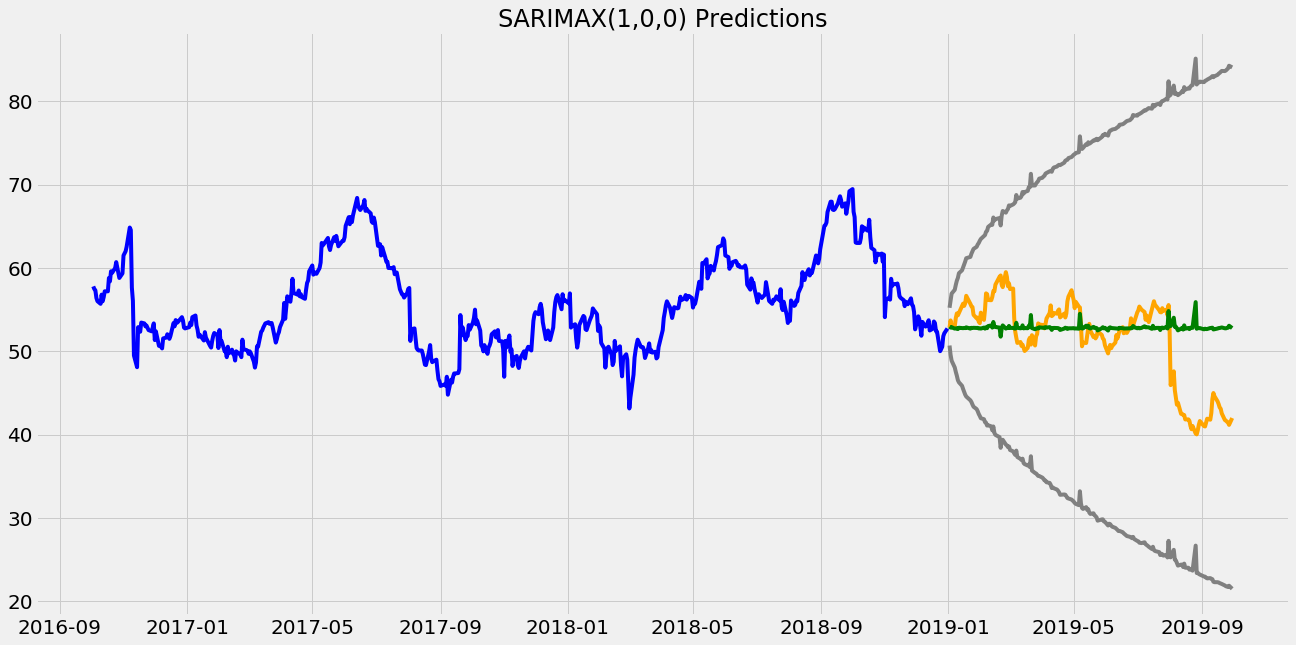

In [460]:
# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(train.index, pd.DataFrame(train['open_price']), color = 'blue')

# Plot testing data.
plt.plot(test.index, pd.DataFrame(test['open_price']), color = 'orange')

# Plot predicted test values.
plt.plot(test.index, pd.DataFrame(pred.predicted_mean), color = 'green')

# CI
plt.plot(test.index, pd.DataFrame(pred_ci.iloc[:,0]), color = 'grey')
plt.plot(test.index, pd.DataFrame(pred_ci.iloc[:,1]), color = 'grey')



# Set label.
plt.title(label = 'SARIMAX(1,0,0) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [438]:
sarima_preds = results.predict(start = results.nobs, 
                               end = results.nobs+187, 
                               exog=test.drop(columns='open_price'),
                               dynamic=True)



/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


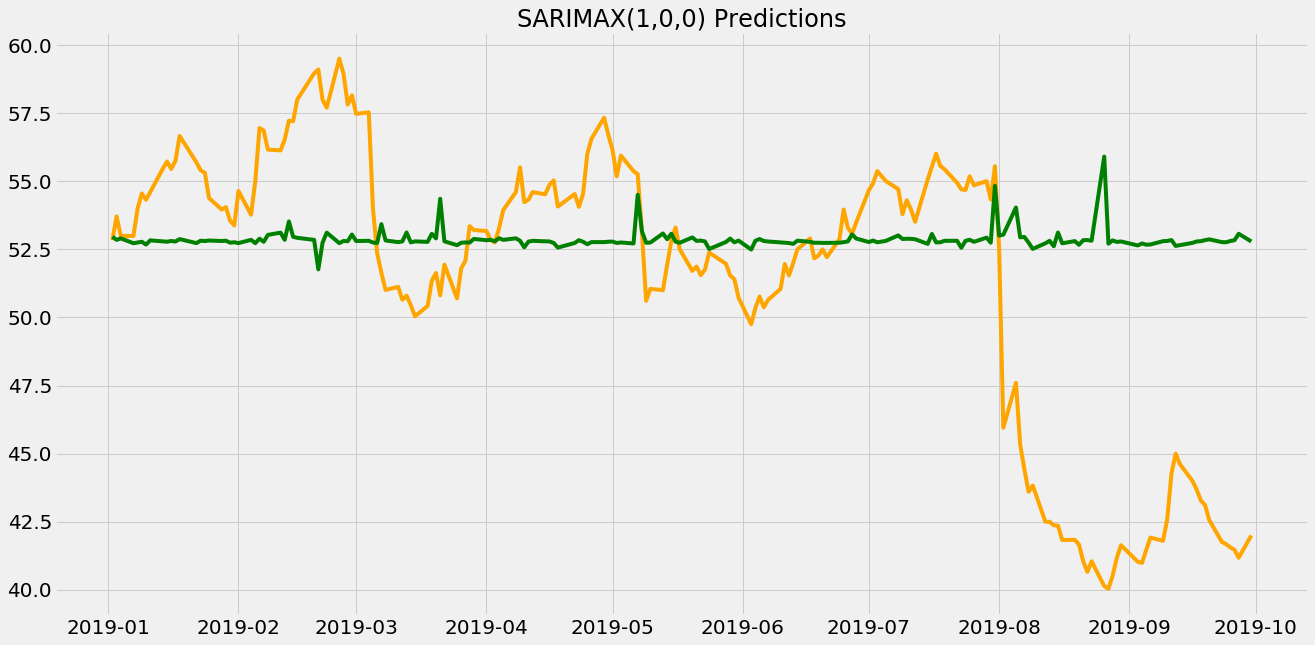

In [434]:
# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
#plt.plot(train.index, pd.DataFrame(train['open_price']), color = 'blue')

# Plot testing data.
plt.plot(test.index, pd.DataFrame(test['open_price']), color = 'orange')

# Plot predicted test values.
plt.plot(test.index, pd.DataFrame(sarima_preds), color = 'green')

# Set label.
plt.title(label = 'SARIMAX(1,0,0) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [431]:
# MSE
mean_squared_error(pd.DataFrame(test['open_price']), sarima_preds)

29.023850355201922

In [464]:
train = train.drop(columns=['tweet_word_count_sum', 'tweet_compound_score_sum', 'tweets_sum', 'redd_gun_score_mean', 'redd_gun_score_sum'])
test = test.drop(columns=['tweet_word_count_sum', 'tweet_compound_score_sum', 'tweets_sum', 'redd_gun_score_mean', 'redd_gun_score_sum'])

KeyError: "['tweet_word_count_sum' 'tweet_compound_score_sum' 'tweets_sum'\n 'redd_gun_score_mean' 'redd_gun_score_sum'] not found in axis"

In [465]:
test = test.drop(columns=['tweet_word_count_sum', 'tweet_compound_score_sum', 'tweets_sum', 'redd_gun_score_mean', 'redd_gun_score_sum'])

In [462]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['open_price'],
                                            train.drop(columns=['open_price']),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC: 3926.0325076780646


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 5) - AIC: 3738.787514257587


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 5) - AIC: 3143.403755592778
ARIMA(0, 0, 0)x(0, 1, 1, 5) - AIC: 2615.140892968928


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 5) - AIC: 3592.634496021934


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 5) - AIC: 3545.7972229824463
ARIMA(0, 0, 0)x(1, 1, 0, 5) - AIC: 2613.7802263617937


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 5) - AIC: 2615.727280979475


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 5) - AIC: 3680.5293333463746


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 5) - AIC: 3588.337562197232
ARIMA(0, 0, 1)x(0, 1, 0, 5) - AIC: 2444.993370377169


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 5) - AIC: 2368.1308650905385


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 5) - AIC: 3575.5487256667993


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 5) - AIC: 3533.3096295300465
ARIMA(0, 0, 1)x(1, 1, 0, 5) - AIC: 2405.699669724856


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 5) - AIC: 2369.134262641208


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 0, 5) - AIC: 1926.3959384434395
ARIMA(0, 1, 0)x(0, 0, 1, 5) - AIC: 1807.6181679477106


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 5) - AIC: 5159.854750759319


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 5) - AIC: 1838.5995681105687


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 5) - AIC: 1810.6845330367241


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 5) - AIC: 1809.7635528972874


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 5) - AIC: 1986.640689125285
ARIMA(0, 1, 0)x(1, 1, 1, 5) - AIC: 1855.9340094873833


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 5) - AIC: 1817.9546583838044


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 5) - AIC: 1806.9638960180498


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 5) - AIC: 2185.394875944138


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 5) - AIC: 1919.288667916039
ARIMA(0, 1, 1)x(1, 0, 0, 5) - AIC: 1812.6850272087413


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC: 1808.9205439338143


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 5) - AIC: 2017.9578276999
ARIMA(0, 1, 1)x(1, 1, 1, 5) - AIC: 1930.5791213707628


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 0, 5) - AIC: 3410.891303065543


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 5) - AIC: 3376.2593081949763


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 5) - AIC: 2176.1247305529505
ARIMA(1, 0, 0)x(0, 1, 1, 5) - AIC: 2031.710697985034


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 5) - AIC: 3397.692646773939
ARIMA(1, 0, 0)x(1, 0, 1, 5) - AIC: 3370.078967945814


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 5) - AIC: 2116.985488959641


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 5) - AIC: 2002.8450907258184


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 5) - AIC: 3317.076322598302


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 5) - AIC: 3305.5125033040986


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 5) - AIC: 2173.5233626806594
ARIMA(1, 0, 1)x(0, 1, 1, 5) - AIC: 2033.2003616266454


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 5) - AIC: 3368.4834493575645
ARIMA(1, 0, 1)x(1, 0, 1, 5) - AIC: 3329.3640091399548


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 5) - AIC: 2042.5267803498487
ARIMA(1, 0, 1)x(1, 1, 1, 5) - AIC: 2004.8089494143235


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 0, 5) - AIC: 1820.1520984569881
ARIMA(1, 1, 0)x(0, 0, 1, 5) - AIC: 1809.603799774322


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 5) - AIC: 2188.395254261168


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 5) - AIC: 1921.601672450466


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 5) - AIC: 1809.582478402977
ARIMA(1, 1, 0)x(1, 0, 1, 5) - AIC: 1811.7517172553721


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 5) - AIC: 2014.0538244279035
ARIMA(1, 1, 0)x(1, 1, 1, 5) - AIC: 1933.0876457724419


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 5) - AIC: 3496.6626270822258


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 5) - AIC: 3470.9141919776393


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 5) - AIC: 2187.527117644398


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 5) - AIC: 1921.665428036765


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 5) - AIC: 3477.0849003619874


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 5) - AIC: 3473.0656828697165


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 5) - AIC: 2016.7020733093486


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 5) - AIC: 1933.0137384952995


In [463]:
mod = sm.tsa.statespace.SARIMAX(endog=train['open_price'],
                                exog=train.drop(columns='open_price'),
                                order=(0, 1, 1),
                                seasonal_order=(0, 0, 1, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
tweet_word_count_mean        -0.0155      0.071     -0.219      0.827      -0.154       0.123
tweet_compound_score_mean     0.8081      1.433      0.564      0.573      -2.001       3.617
redd_gun_comment_mean        -0.0116      0.014     -0.862      0.389      -0.038       0.015
redd_gun_compound_mean        0.0933      0.274      0.340      0.734      -0.445       0.631
redd_gun_comment_sum          0.0063      0.008      0.793      0.428      -0.009       0.022
redd_gun_post_count           0.0032      0.115      0.028      0.978      -0.221       0.228
redd_pol_score_mean          -0.0002      0.000     -0.453      0.650      -0.001       0.001
redd_pol_comment_mean         0.0008      0.001      0.592      0.554      -0.002       0.003
redd_pol_compound_mean        0.0874      0.172      0.508  

**As we can see, the p-value for all features are pretty high. We can conclude this model is performing poorly.**

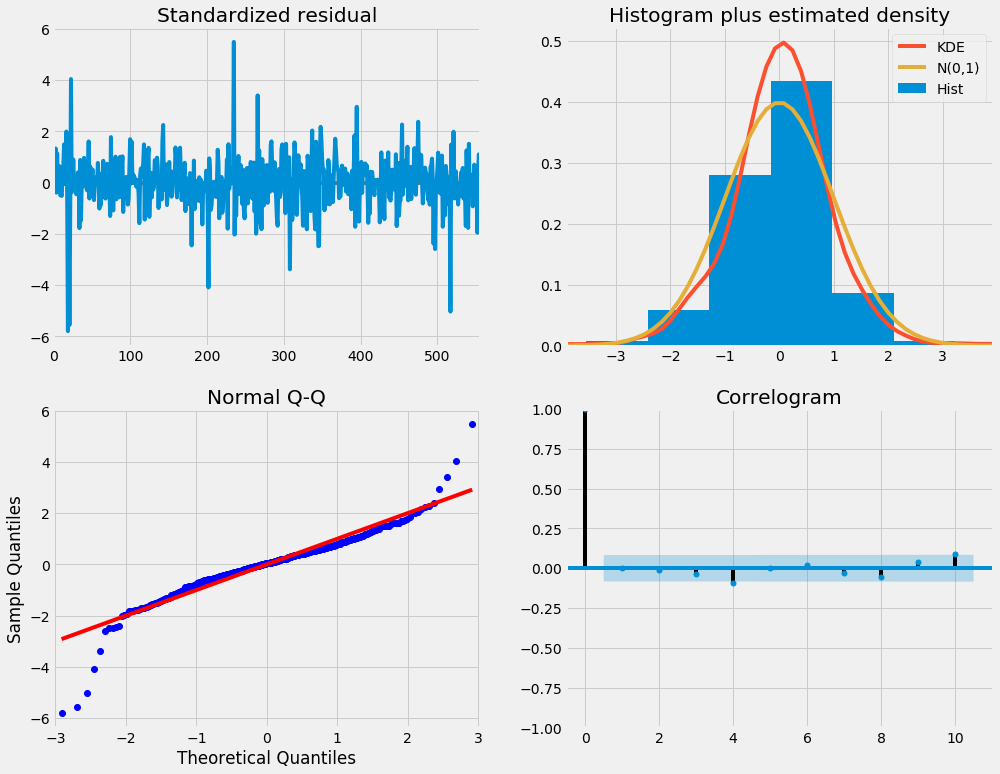

In [466]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

**The above plot shows that the residuals of our model are not normally distributed well. We should improve on our model. Our ultimate goal is to have uncorrelated residuals and normally distributed residuals.**

In [467]:
test_dates = test.index

In [468]:
sarima_preds

565    52.960687
566    52.847330
567    52.901456
568    52.723702
569    52.751983
         ...    
748    52.759238
749    52.805242
750    52.833956
751    53.069876
752    52.787879
Length: 188, dtype: float64

In [469]:
train

,open_price,tweet_word_count_mean,tweet_compound_score_mean,redd_gun_comment_mean,redd_gun_compound_mean,redd_gun_comment_sum,redd_gun_post_count,redd_pol_score_mean,redd_pol_comment_mean,redd_pol_compound_mean,redd_pol_score_sum,redd_pol_comment_sum,redd_pol_post_count,10-k,10-q,8-k
date,,,,,,,,,,,,,,,,
2016-10-03,57.790001,16.370697,-0.354404,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04,57.470001,16.277286,-0.350252,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-05,57.330002,16.521776,-0.283701,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-06,56.400002,16.014870,-0.273418,7.0,-0.7184,7.0,1.0,2.0,5.0,-0.19580,4.0,10.0,2.0,0.0,0.0,0.0
2016-10-07,56.020000,15.933116,-0.343057,1.0,-0.1280,1.0,1.0,0.0,3.0,0.36120,0.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,50.020000,29.295554,-0.271968,0.0,0.0000,0.0,0.0,1.0,138.0,-0.34000,1.0,138.0,1.0,0.0,0.0,0.0
2018-12-26,50.549999,28.225690,-0.269353,0.0,0.0000,0.0,0.0,1.0,19.0,-0.34000,1.0,19.0,1.0,0.0,0.0,0.0
2018-12-27,51.810001,29.036620,-0.334724,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [470]:
start = test_dates[0]
end = test_dates[-1]

In [471]:
results.nobs

565

In [472]:
pred = results.get_prediction(start = results.nobs, 
                               end = results.nobs+187, 
                               exog=test.drop(columns='open_price'))

pred_ci = preds.conf_int()


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [473]:
pred_ci.iloc[:,0]

565    50.696528
566    49.583451
567    48.879093
568    48.064743
569    47.533517
         ...    
748    21.824537
749    21.786706
750    21.731810
751    21.884343
752    21.519183
Name: lower open_price, Length: 188, dtype: float64

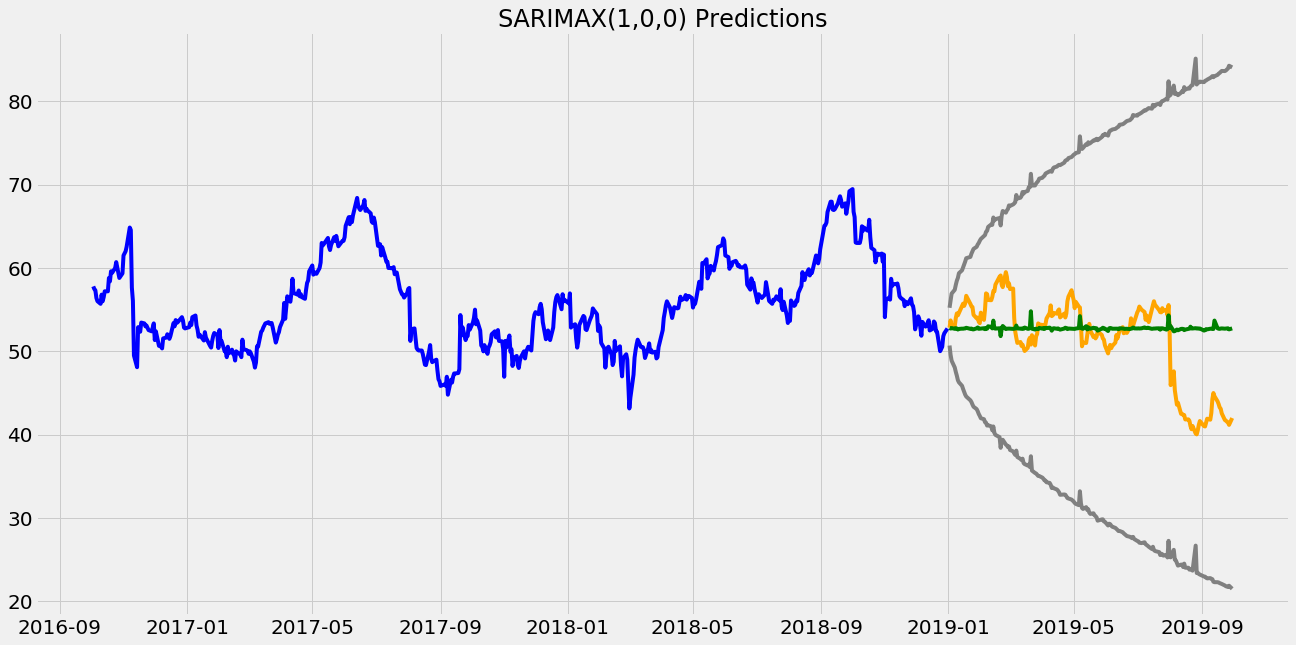

In [474]:
# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(train.index, pd.DataFrame(train['open_price']), color = 'blue')

# Plot testing data.
plt.plot(test.index, pd.DataFrame(test['open_price']), color = 'orange')

# Plot predicted test values.
plt.plot(test.index, pd.DataFrame(pred.predicted_mean), color = 'green')

# CI
plt.plot(test.index, pd.DataFrame(pred_ci.iloc[:,0]), color = 'grey')
plt.plot(test.index, pd.DataFrame(pred_ci.iloc[:,1]), color = 'grey')



# Set label.
plt.title(label = 'SARIMAX(1,0,0) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [478]:
sarima_preds = results.predict(start = results.nobs, 
                               end = results.nobs+187, 
                               exog=test.drop(columns='open_price'),
                               dynamic=False)



/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


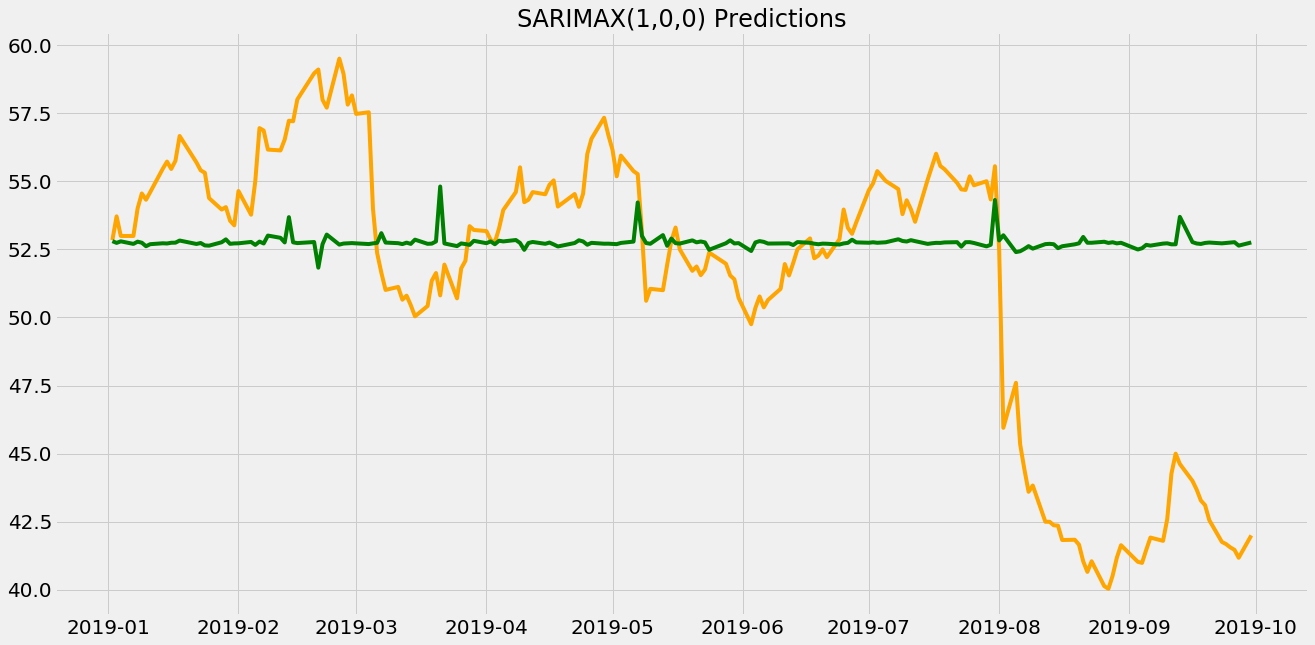

In [479]:
# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
#plt.plot(train.index, pd.DataFrame(train['open_price']), color = 'blue')

# Plot testing data.
plt.plot(test.index, pd.DataFrame(test['open_price']), color = 'orange')

# Plot predicted test values.
plt.plot(test.index, pd.DataFrame(sarima_preds), color = 'green')

# Set label.
plt.title(label = 'SARIMAX(1,0,0) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [480]:
# MSE
mean_squared_error(pd.DataFrame(test['open_price']), sarima_preds)

28.293256983435143